# Table of Contents
 <p><div class="lev1"><a href="#Single-loop"><span class="toc-item-num">1&nbsp;&nbsp;</span>Single loop</a></div><div class="lev1"><a href="#Many-LEFs"><span class="toc-item-num">2&nbsp;&nbsp;</span>Many LEFs</a></div><div class="lev1"><a href="#Statistics-of-loop-arrays."><span class="toc-item-num">3&nbsp;&nbsp;</span>Statistics of loop arrays.</a></div><div class="lev1"><a href="#Visualize-loops"><span class="toc-item-num">4&nbsp;&nbsp;</span>Visualize loops</a></div>

In [ ]:
import sys

import numpy as np

import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

# Single loop

In [ ]:
p = {}
p['L'] = 100
p['N'] = 1
p['R_OFF'] = 1.0 / 100
p['R_EXTEND'] = float(1.0)
p['R_SHRINK'] = 0#float(.4)
p['R_SWITCH'] =  0.03

p['T_MAX_LIFETIMES'] = 3.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 300
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)
print(ts)


In [ ]:
n=0
plt.plot(
    l_sites[:,n], c='b')
plt.plot(
    r_sites[:,n], c='g')

plt.xlim(0,100)

# Many LEFs

In [ ]:
p = {}
p['L'] = 20000
p['N'] = 300
p['R_OFF'] = 1.0 / 1000.0
p['R_EXTEND'] = float(2.0)
p['R_SHRINK'] = float(0.1)

p['R_SWITCH'] = p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 200
p['PROCESS_NAME'] = b'proc'

l_sites, r_sites, leading_legs, ts = simlef_onesided.simulate(p)
#l_sites, r_sites, ts = simlef.simulate(p)


In [ ]:
plt.figure(figsize=(15,5))
n=0
plt.step(
    ts,
    l_sites[:,n], c='g',where='post',)
plt.step(
    ts,
    r_sites[:,n], c='g',where='post',)


n=1
plt.step(
    ts,
    l_sites[:,n], c='b',
    where='post',)
plt.step(
    ts,
    r_sites[:,n], c='b',
    where='post',)

# Statistics of loop arrays.

In [ ]:
import collections


In [ ]:
t=-1
parents = looptools.get_parent_loops(
            l_sites[t], 
            r_sites[t])
root_loops_idxs = np.where(parents == -1)[0]
children = looptools.get_loop_branches(parents)

In [ ]:
plt.hist(
    r_sites[t][root_loops_idxs] - l_sites[t][root_loops_idxs],
    bins=20)

# Visualize loops

In [ ]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=2.0)
    plt.xlim(0,p['L']//10)
    plt.xticks([])
    plt.xlabel('chromosomal position')

In [ ]:
loopviz.prepare_canvas(p['L'])

loopviz.plot_lefs(
    l_sites=l_sites[-1,:], 
    r_sites=r_sites[-1,:], 
    colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
    max_height=200,
    plot_text=False,
    height_factor=0.5)
plt.xlim(10000,15000)
plt.xlabel('chromosomal position')

# Testing simlef.pyx

In [1]:
import sys

import numpy as np

import pyximport; pyximport.install(
    setup_args={"include_dirs":np.get_include()},
    reload_support=True)
from looplib import loopviz, looptools, simlef_onesided, simlef
import os, sys, glob, shelve, time


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

from importlib import reload
reload(loopviz)

import seaborn as sns
sns.set_style('white')

In [ ]:
p = {}
p['L'] = 20000                  # 20000
p['N'] = 2
p['R_OFF'] = 1.0 / 1000.0       # 1.0 / 1000.0
p['R_EXTEND'] = float(2.0)      # 2.0
p['R_SHRINK'] = float(0.1)      # 0.1

p['R_SWITCH'] = p['R_OFF'] * 10     # p['R_OFF'] * 10

p['T_MAX_LIFETIMES'] = 100.0        # 100.0
p['T_MAX'] = p['T_MAX_LIFETIMES'] / p['R_OFF']
p['N_SNAPSHOTS'] = 100000              # 200
p['PROCESS_NAME'] = b'proc'         # b'proc'

l_sites, r_sites, ts = simlef.simulate(p, verbose = True)
#l_sites, r_sites, ts = simlef.simulate(p)
#print(ts)



Number of -1 entries in l_sites: 29


(0.0, 10000.0)

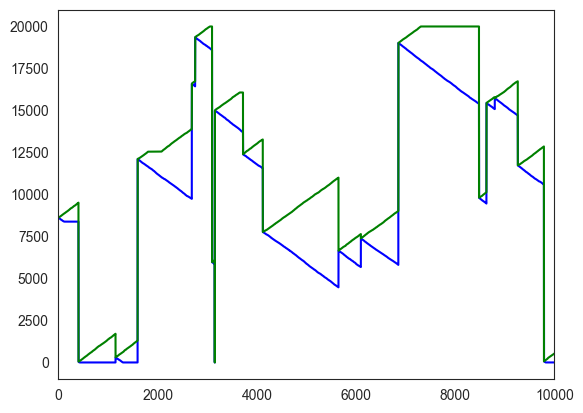

In [4]:
n=0
plt.plot(
    l_sites[:,n], c='b')
plt.plot(
    r_sites[:,n], c='g')
num_minus_ones = np.sum(l_sites == -1)
print(f"Number of -1 entries in l_sites: {num_minus_ones}")

plt.xlim(0,10000)

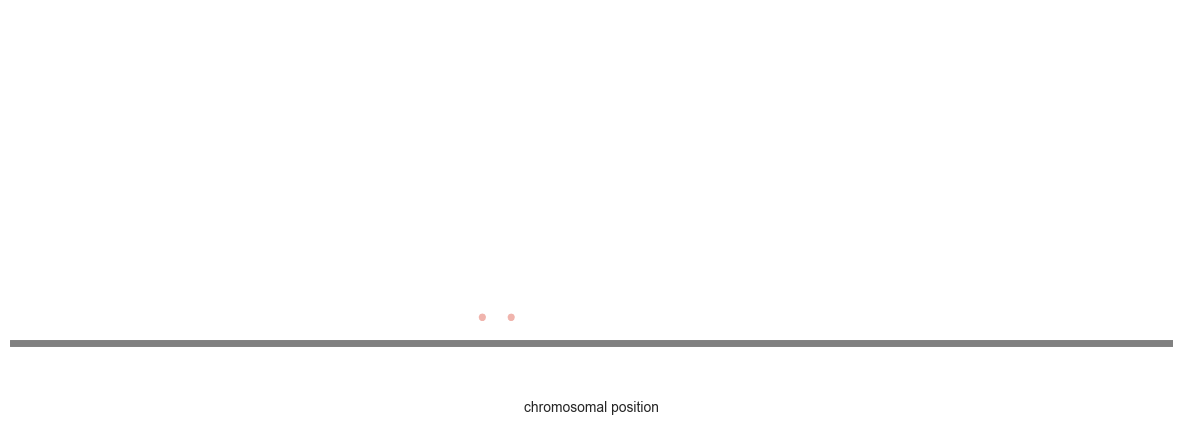

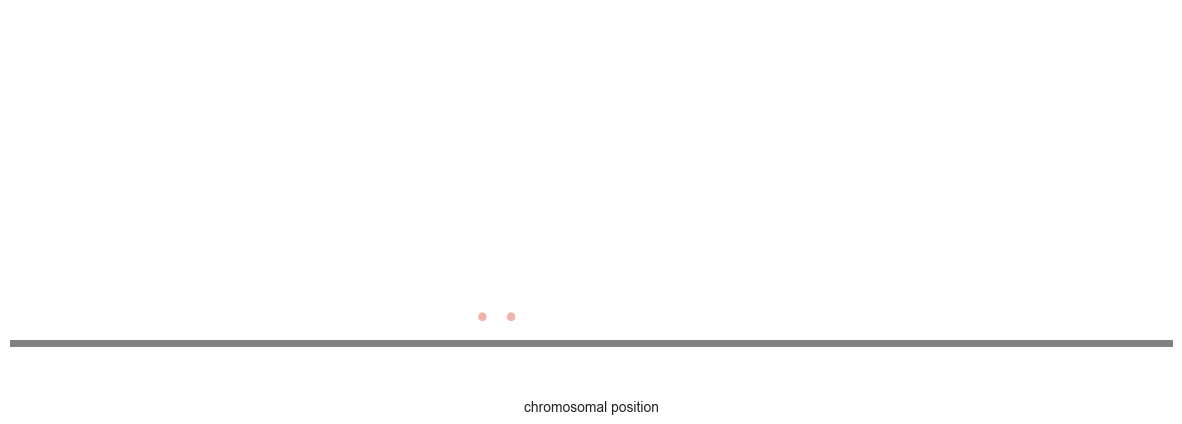

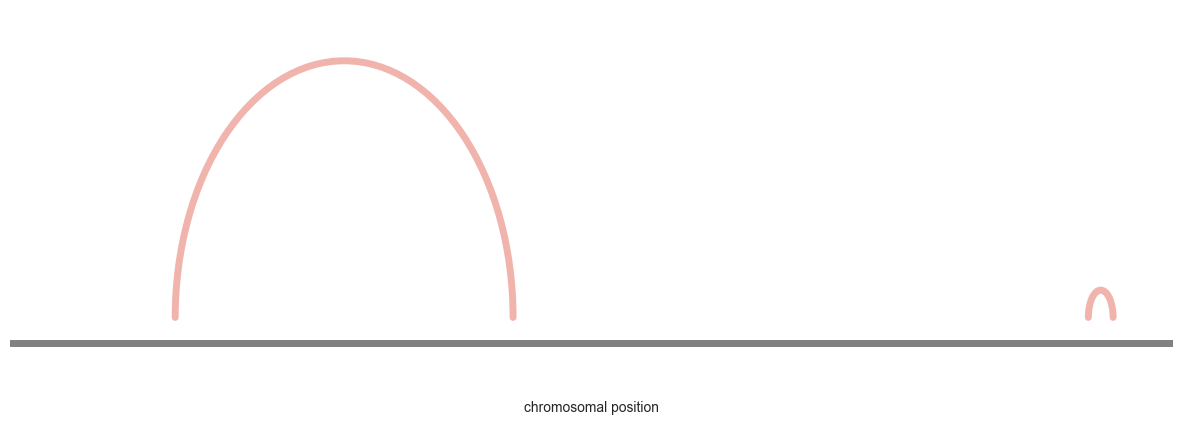

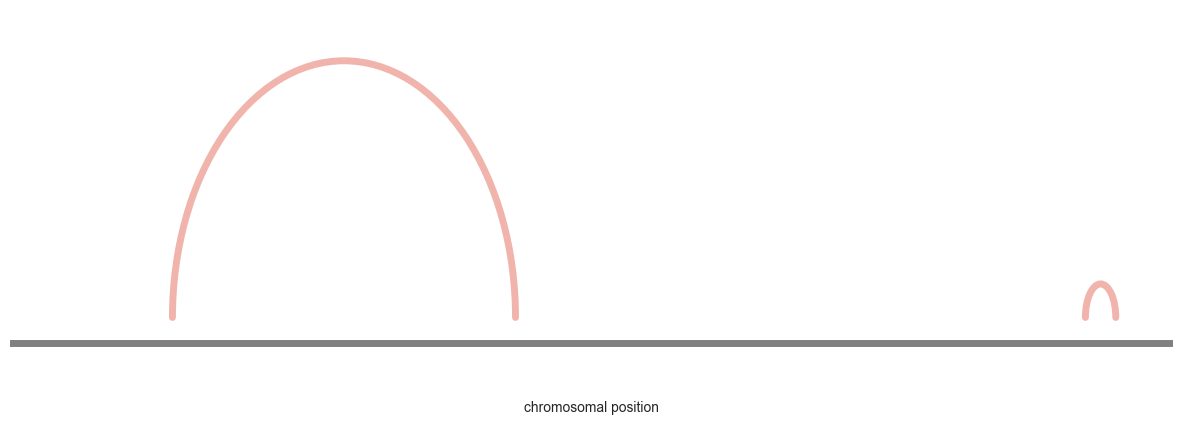

In [5]:
ts4plot = [0, 5, -20, -1]
for t in ts4plot:    
    loopviz.prepare_canvas(p['L'])
    loopviz.plot_lefs(
        l_sites=l_sites[t], 
        r_sites=r_sites[t], 
        colors=[(223.0/255.0,90/255.0,73/255.0)] *500,
        max_height=200,
        plot_text=False,
        height_factor=0.1)  # Controlls loop hight, hight is min(max_height, (r-l)/2.0*height_factor)
    plt.xlim(0,p['L'])
    plt.xticks([])
    plt.xlabel('chromosomal position')

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(10, 4))

def update(frame):
    ax.clear()
    ax.set_xlim(-20, p['L'] + 20)
    ax.set_ylim(-30, 120)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.axhline(-10, color='gray', lw=5, zorder=-1)
    ax.set_xlabel('chromosomal position')
    ax.set_title(f"t = {ts[frame]:.2f}")
    loopviz.plot_lefs(
        l_sites=l_sites[frame],
        r_sites=r_sites[frame],
        colors=[(223.0/255.0,90/255.0,73/255.0)] * 500,
        ax=ax,  # Pass ax!
        max_height=200,
        plot_text=False,
        height_factor=0.1
    )

ani = FuncAnimation(fig, update, frames=len(ts), interval=10)
ani.save("video_trial.mp4", writer="ffmpeg", fps=60)
plt.show()

## Analysis of Produced data

What is the data currently showing us?